# Top 10000 Songs on Spotify


## Contents
* Data Cleaning
* Data Understanding and EDA
* Hypothesis Tests

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
sns.set(font_scale=1.3)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [2]:
data = pd.read_csv('top_10000_1960-now.csv')
data.head(2)

,Track URI,Track Name,Artist URI(s),Artist Name(s),Album URI,Album Name,Album Artist URI(s),Album Artist Name(s),Album Release Date,Album Image URL,Disc Number,Track Number,Track Duration (ms),Track Preview URL,Explicit,Popularity,ISRC,Added By,Added At,Artist Genres,Danceability,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Time Signature,Album Genres,Label,Copyrights
0,spotify:track:1XAZlnVtthcDZt2NI1Dtxo,Justified & Ancient - Stand by the Jams,spotify:artist:6dYrdRlNZSKaVxYg5IrvCH,The KLF,spotify:album:4MC0ZjNtVP1nDD5lsLxFjc,Songs Collection,spotify:artist:6dYrdRlNZSKaVxYg5IrvCH,The KLF,1992-08-03,https://i.scdn.co/image/ab67616d0000b27355346b...,1,3,216270,NaN,False,0,QMARG1760056,spotify:user:bradnumber1,2020-03-05T09:20:39Z,"acid house,ambient house,big beat,hip house",0.617,0.872,8.0,-12.305,1.0,0.048,0.0158,0.112000,0.408,0.504,111.458,4.0,NaN,Jams Communications,"C 1992 Copyright Control, P 1992 Jams Communic..."
1,spotify:track:6a8GbQIlV8HBUW3c6Uk9PH,I Know You Want Me (Calle Ocho),spotify:artist:0TnOYISbd1XYRBk9myaseg,Pitbull,spotify:album:5xLAcbvbSAlRtPXnKkggXA,Pitbull Starring In Rebelution,spotify:artist:0TnOYISbd1XYRBk9myaseg,Pitbull,2009-10-23,https://i.scdn.co/image/ab67616d0000b27326d73a...,1,3,237120,https://p.scdn.co/mp3-preview/d6f8883fc955cb0e...,False,64,USJAY0900144,spotify:user:bradnumber1,2021-08-08T09:26:31Z,"dance pop,miami hip hop,pop",0.825,0.743,2.0,-5.995,1.0,0.149,0.0142,0.000021,0.237,0.800,127.045,4.0,NaN,Mr.305/Polo Grounds Music/J Records,"P (P) 2009 RCA/JIVE Label Group, a unit of Son..."


In [3]:
data.shape

(9999, 35)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9999 entries, 0 to 9998
Data columns (total 35 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Track URI             9999 non-null   object 
 1   Track Name            9998 non-null   object 
 2   Artist URI(s)         9997 non-null   object 
 3   Artist Name(s)        9998 non-null   object 
 4   Album URI             9997 non-null   object 
 5   Album Name            9998 non-null   object 
 6   Album Artist URI(s)   9997 non-null   object 
 7   Album Artist Name(s)  9997 non-null   object 
 8   Album Release Date    9997 non-null   object 
 9   Album Image URL       9995 non-null   object 
 10  Disc Number           9999 non-null   int64  
 11  Track Number          9999 non-null   int64  
 12  Track Duration (ms)   9999 non-null   int64  
 13  Track Preview URL     7102 non-null   object 
 14  Explicit              9999 non-null   bool   
 15  Popularity           

## Data Cleaning

In [5]:
data.duplicated().sum()

48

In [6]:
data.drop_duplicates(inplace=True)

Removing unnecessary features

In [7]:
data.drop(["Track URI", "Artist URI(s)", "Album URI", "Album Artist URI(s)",
           "Album Image URL", "Added By", "Added At", "Explicit", "Album Genres",
           "ISRC", "Disc Number", "Track Preview URL", "Copyrights"], axis=1, inplace=True)

In [8]:
data.head(2)

,Track Name,Artist Name(s),Album Name,Album Artist Name(s),Album Release Date,Track Number,Track Duration (ms),Popularity,Artist Genres,Danceability,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Time Signature,Label
0,Justified & Ancient - Stand by the Jams,The KLF,Songs Collection,The KLF,1992-08-03,3,216270,0,"acid house,ambient house,big beat,hip house",0.617,0.872,8.0,-12.305,1.0,0.048,0.0158,0.112000,0.408,0.504,111.458,4.0,Jams Communications
1,I Know You Want Me (Calle Ocho),Pitbull,Pitbull Starring In Rebelution,Pitbull,2009-10-23,3,237120,64,"dance pop,miami hip hop,pop",0.825,0.743,2.0,-5.995,1.0,0.149,0.0142,0.000021,0.237,0.800,127.045,4.0,Mr.305/Polo Grounds Music/J Records


In [9]:
data.shape

(9951, 22)

Null values

In [10]:
data.isna().sum()

Track Name                1
Artist Name(s)            1
Album Name                1
Album Artist Name(s)      2
Album Release Date        2
Track Number              0
Track Duration (ms)       0
Popularity                0
Artist Genres           549
Danceability              2
Energy                    2
Key                       2
Loudness                  2
Mode                      2
Speechiness               2
Acousticness              2
Instrumentalness          2
Liveness                  2
Valence                   2
Tempo                     2
Time Signature            2
Label                     6
dtype: int64

We just drop them

In [11]:
data.dropna(inplace=True)

In [12]:
data.shape

(9399, 22)

Extracting numerical features and categorical features

In [13]:
num_df = data.select_dtypes(include=['number'])
num_cols = num_df.columns
len(num_cols)

15

In [14]:
cat_df = data.select_dtypes(include=['object'])
cat_cols = cat_df.columns
len(cat_cols)

7

## Data Understanding and EDA
Numerical features

Describing numerical features.

Here we include mode, median and trim_mean to remove 1% from head and tail

In [15]:
df_describe = num_df.describe()
df_describe.loc['median'] = num_df.median()
df_describe.loc['mode'] = num_df.mode().iloc[0]
df_describe.loc['trim_mean'] = stats.trim_mean(num_df, proportiontocut=0.1)
df_describe.T

,count,mean,std,min,25%,50%,75%,max,median,mode,trim_mean
Track Number,9399.0,4.967124,5.468777,1.000000,1.00000,3.000000,7.000000,93.000,3.000000,1.0000,3.976865
Track Duration (ms),9399.0,225578.667837,54102.784937,91226.000000,193381.50000,220454.000000,251233.000000,1561133.000,220454.000000,208106.0000,222009.295041
Popularity,9399.0,38.475157,29.597980,0.000000,0.00000,44.000000,64.000000,98.000,44.000000,0.0000,37.926074
Danceability,9399.0,0.608087,0.145729,0.000000,0.51500,0.617000,0.709000,0.988,0.617000,0.6720,0.612625
Energy,9399.0,0.685295,0.189786,0.000020,0.56400,0.713000,0.836000,0.997,0.713000,0.8740,0.700076
Key,9399.0,5.178742,3.584384,0.000000,2.00000,5.000000,8.000000,11.000,5.000000,0.0000,5.128972
Loudness,9399.0,-7.193218,3.249541,-29.368000,-8.89700,-6.446000,-4.857000,2.769,-6.446000,-6.6840,-6.842417
Mode,9399.0,0.697202,0.459493,0.000000,0.00000,1.000000,1.000000,1.000,1.000000,1.0000,0.746443
Speechiness,9399.0,0.065571,0.061883,0.000000,0.03315,0.043100,0.067900,0.711,0.043100,0.0305,0.050964
Acousticness,9399.0,0.204496,0.245883,0.000003,0.01820,0.092500,0.308500,0.987,0.092500,0.1070,0.159447


In [16]:
df_describe.T[['mean', 'trim_mean', 'median', 'mode']]

,mean,trim_mean,median,mode
Track Number,4.967124,3.976865,3.000000,1.0000
Track Duration (ms),225578.667837,222009.295041,220454.000000,208106.0000
Popularity,38.475157,37.926074,44.000000,0.0000
Danceability,0.608087,0.612625,0.617000,0.6720
Energy,0.685295,0.700076,0.713000,0.8740
Key,5.178742,5.128972,5.000000,0.0000
Loudness,-7.193218,-6.842417,-6.446000,-6.6840
Mode,0.697202,0.746443,1.000000,1.0000
Speechiness,0.065571,0.050964,0.043100,0.0305
Acousticness,0.204496,0.159447,0.092500,0.1070


In [17]:
def box_plot(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = int((nCol + nGraphPerRow - 1) / nGraphPerRow)
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        columnDf.plot.box()
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i + 1})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()

In [18]:
def eda(start, end):
    num_df[num_cols[start:end]].hist(figsize=(12, 8), layout=(2, 4))
    box_plot(num_df[num_cols[start:end]], 8, 4)
    plt.show()
    
    print()
    print('Unique values')
    for col in num_cols[start:end]:
        print(col, ':', num_df[col].nunique())

In [19]:
num_df.shape

(9399, 15)

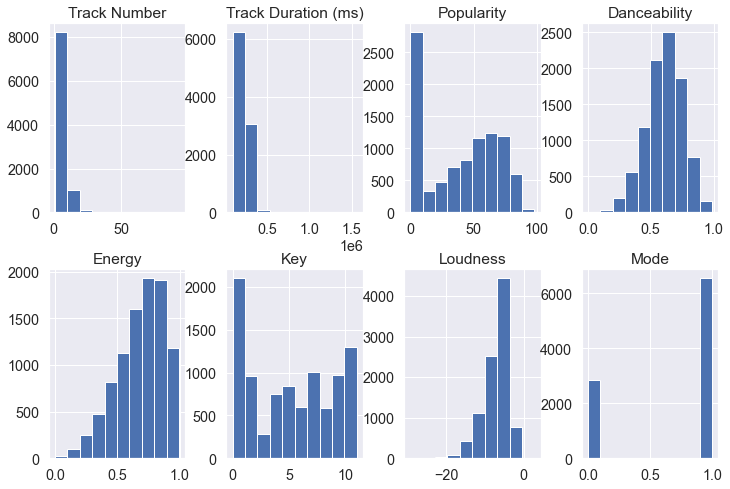

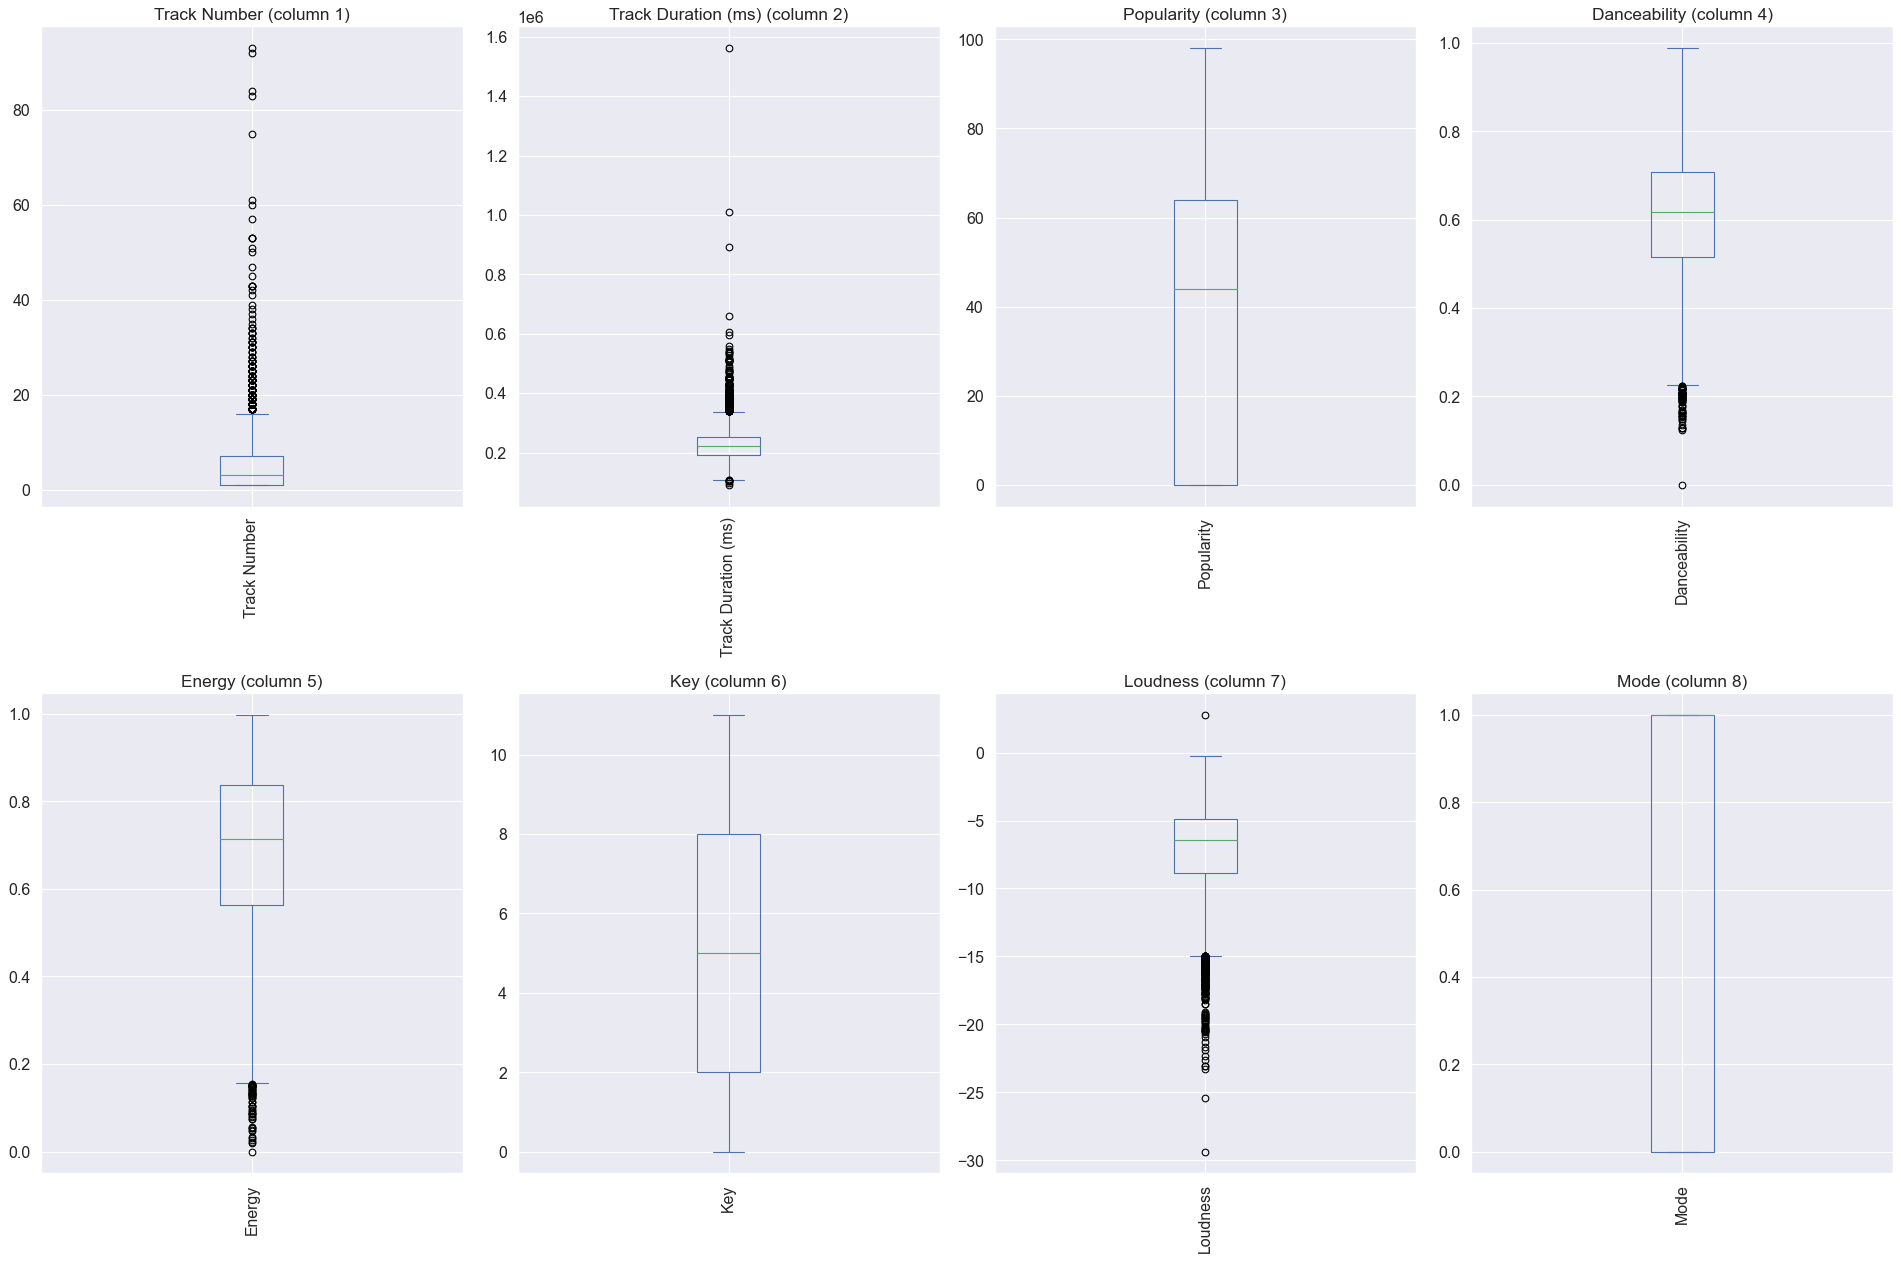


Unique values
Track Number : 55
Track Duration (ms) : 6973
Popularity : 99
Danceability : 772
Energy : 871
Key : 12
Loudness : 6067
Mode : 2


In [20]:
eda(0, 8)

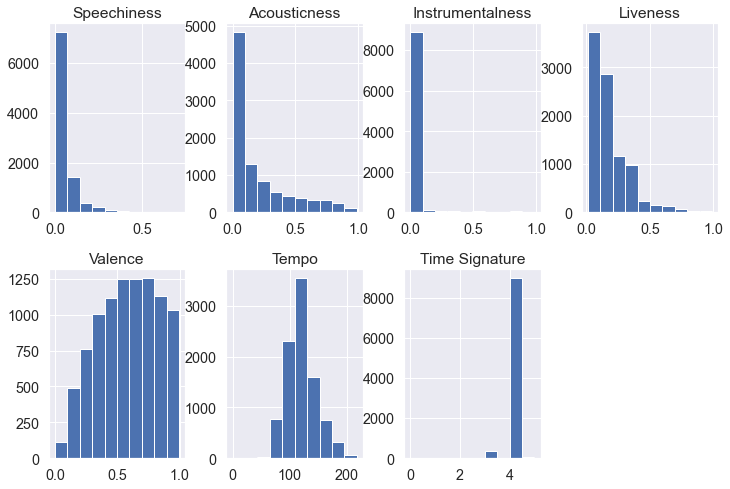

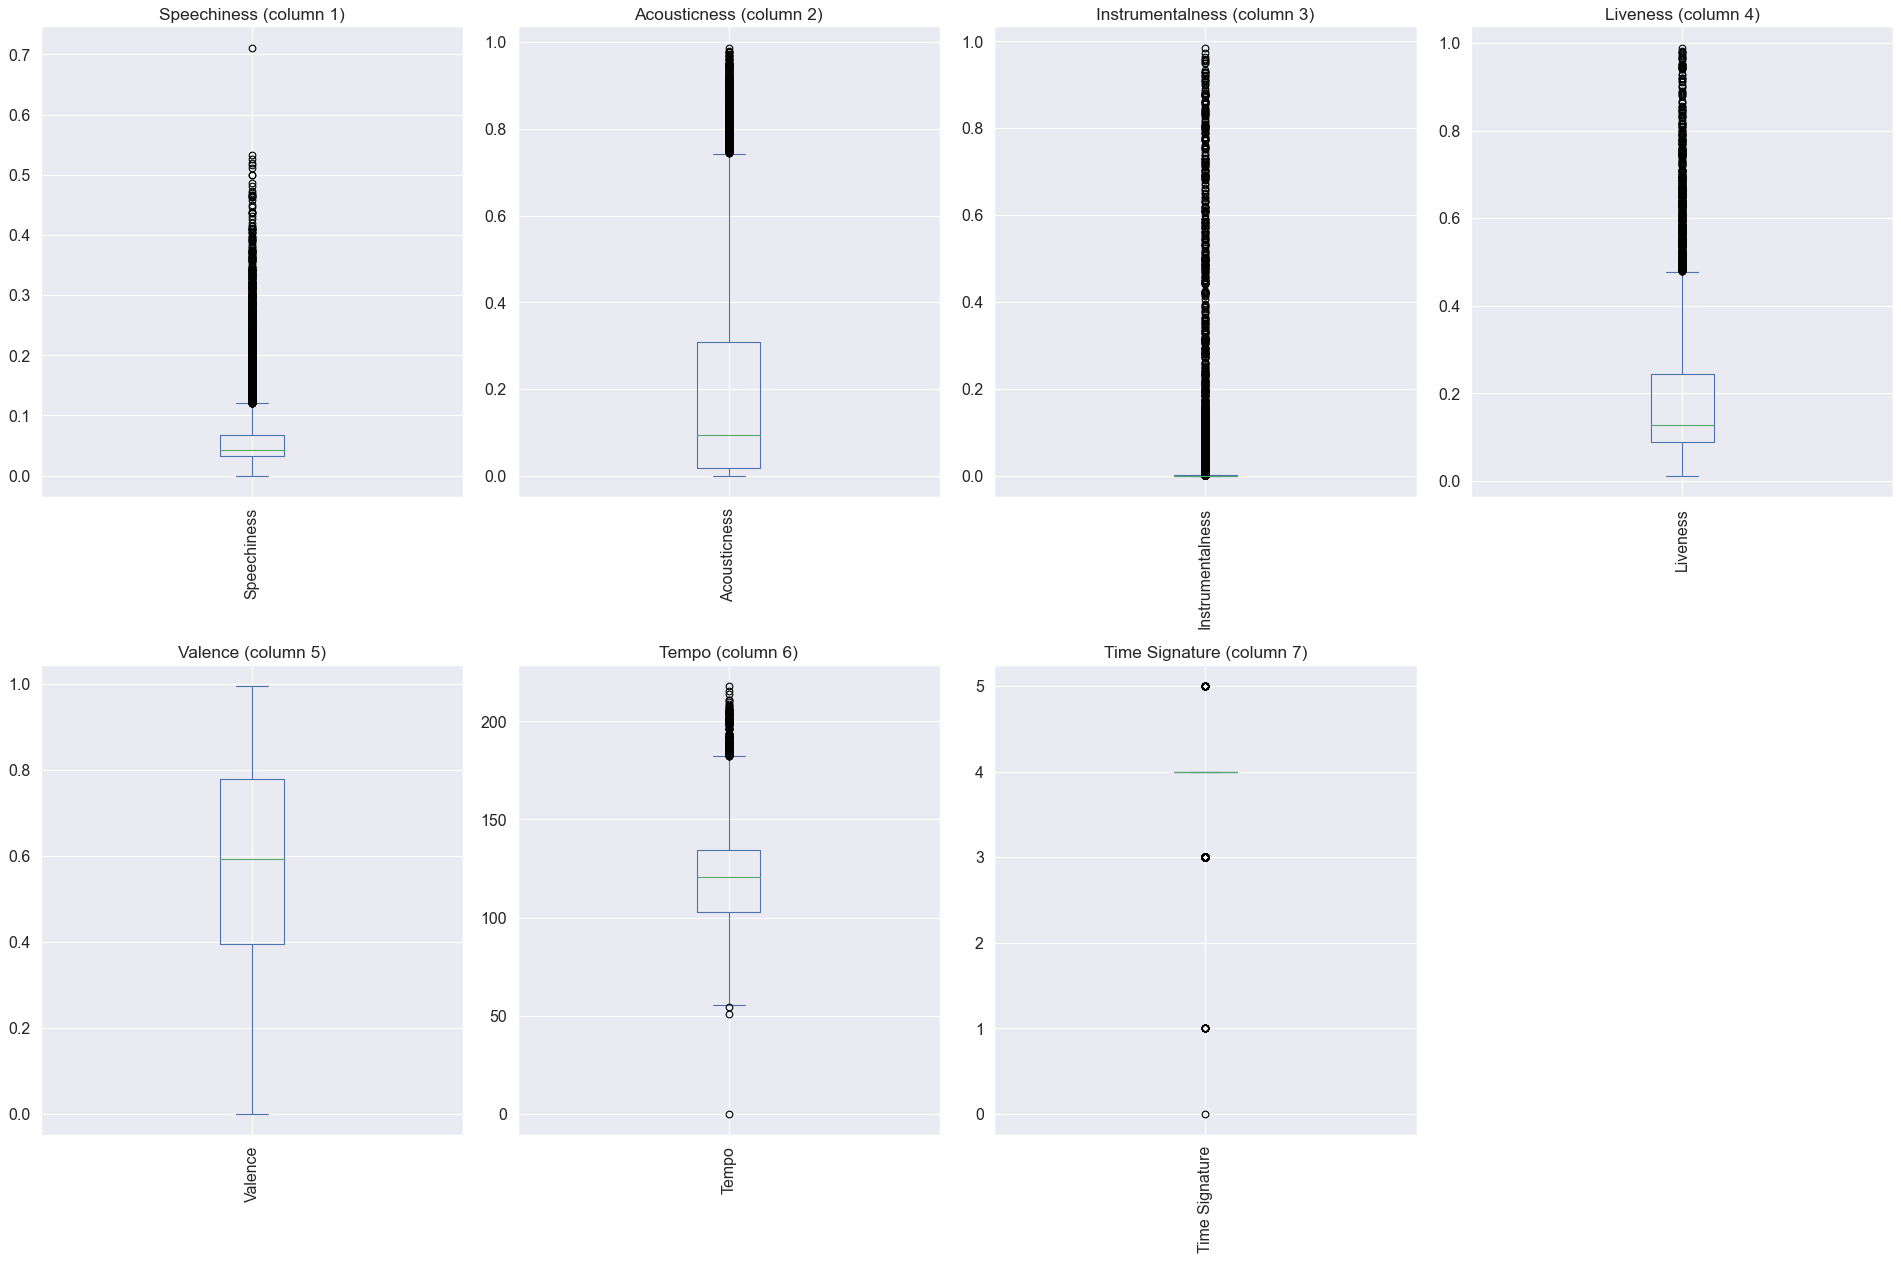


Unique values
Speechiness : 1055
Acousticness : 2691
Instrumentalness : 2913
Liveness : 1337
Valence : 988
Tempo : 8178
Time Signature : 5


In [21]:
eda(8, 16)

Categorical features

In [22]:
cat_df.head(3)

,Track Name,Artist Name(s),Album Name,Album Artist Name(s),Album Release Date,Artist Genres,Label
0,Justified & Ancient - Stand by the Jams,The KLF,Songs Collection,The KLF,1992-08-03,"acid house,ambient house,big beat,hip house",Jams Communications
1,I Know You Want Me (Calle Ocho),Pitbull,Pitbull Starring In Rebelution,Pitbull,2009-10-23,"dance pop,miami hip hop,pop",Mr.305/Polo Grounds Music/J Records
2,From the Bottom of My Broken Heart,Britney Spears,...Baby One More Time (Digital Deluxe Version),Britney Spears,1999-01-12,"dance pop,pop",Jive


In [23]:
cat_df.shape

(9399, 7)

In [24]:
cat_df.nunique()

Track Name              7790
Artist Name(s)          3691
Album Name              6197
Album Artist Name(s)    2930
Album Release Date      3183
Artist Genres           2815
Label                   1301
dtype: int64

Top 10 artists plot

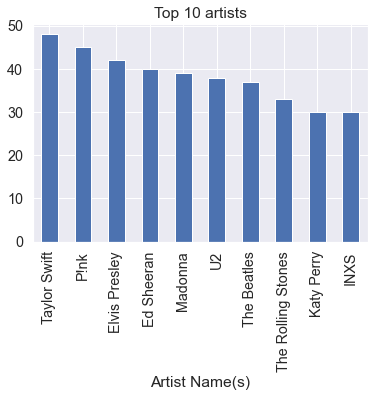

In [25]:
top10_artists = cat_df.groupby(by='Artist Name(s)')['Artist Name(s)'].count().sort_values(ascending=False)[:10]
top10_artists.plot(kind='bar')
plt.title('Top 10 artists')
plt.show()

Top 10 songs

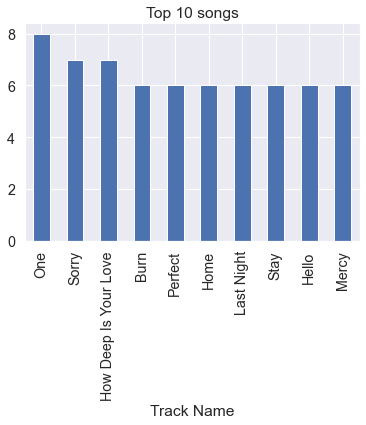

In [26]:
top10_artists = cat_df.groupby(by='Track Name')['Track Name'].count().sort_values(ascending=False)[:10]
top10_artists.plot(kind='bar')
plt.title('Top 10 songs')
plt.show()

Top 10 albums

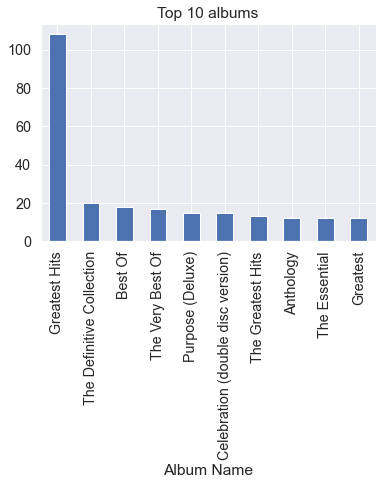

In [27]:
top10_artists = cat_df.groupby(by='Album Name')['Album Name'].count().sort_values(ascending=False)[:10]
top10_artists.plot(kind='bar')
plt.title('Top 10 albums')
plt.show()

### Analyzing Time

In [28]:
data['Album Release Date'] = pd.to_datetime(data['Album Release Date'], errors='coerce')

In [29]:
data['ReleaseYear'] = data['Album Release Date'].dt.year

Number of songs per year

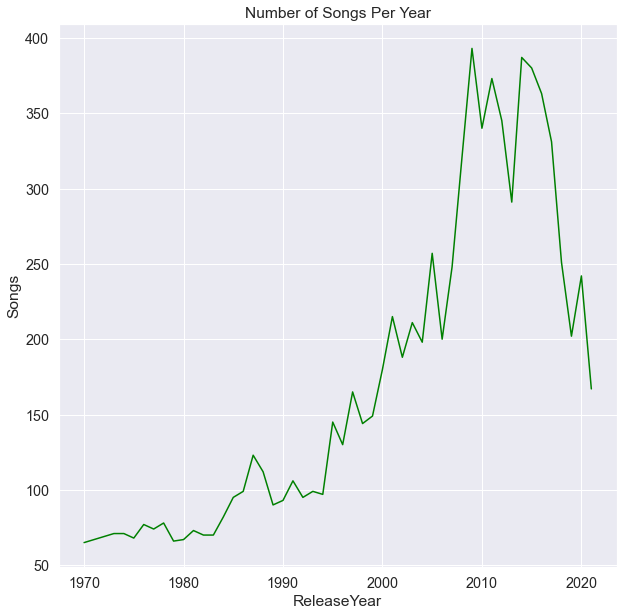

In [31]:
songs_per_year = data['ReleaseYear'].value_counts().reset_index(drop=False).rename(columns={'index': 'ReleaseYear',
                                                                                            'ReleaseYear': 'Songs'})
plt.figure(figsize=(10, 10))
sns.lineplot(data=songs_per_year.head(50), x='ReleaseYear', y='Songs', color='green')
plt.title('Number of Songs Per Year')
plt.show()

Loudness of music over the years

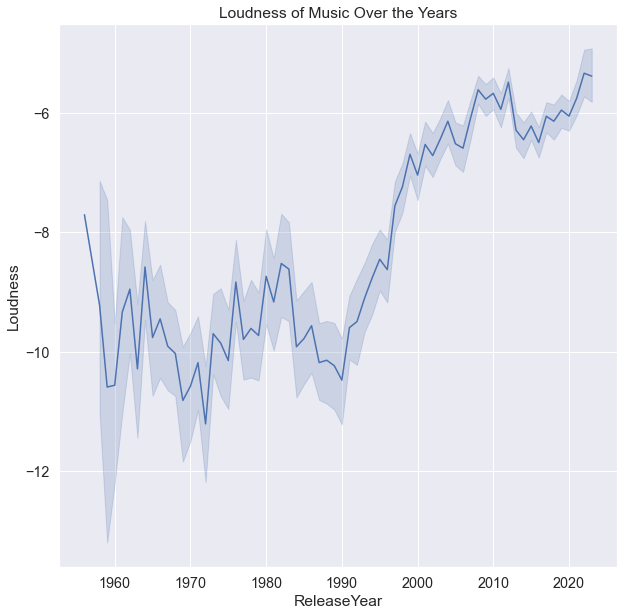

In [39]:
plt.figure(figsize=(10, 10))
sns.lineplot(x="ReleaseYear", y="Loudness", data=data)
plt.title("Loudness of Music Over the Years")
plt.show()

Duration over time

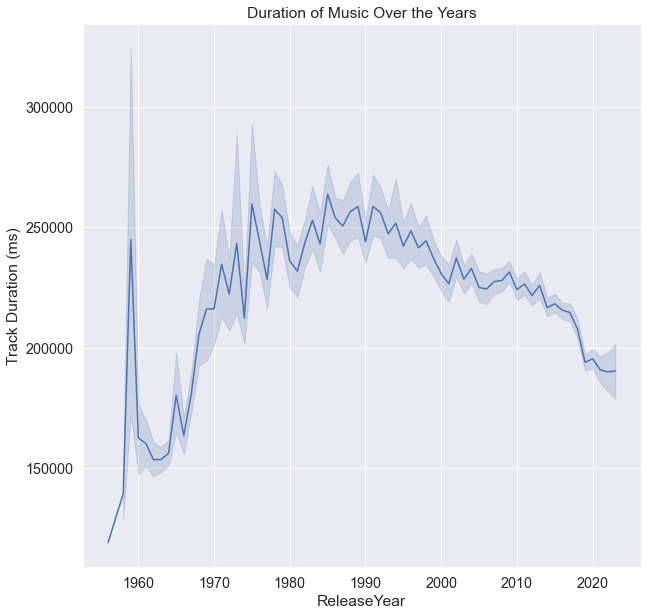

In [41]:
plt.figure(figsize=(10, 10))
sns.lineplot(x="ReleaseYear", y="Track Duration (ms)", data=data)
plt.title("Duration of Music Over the Years")
plt.show()

### Correlation Analysis

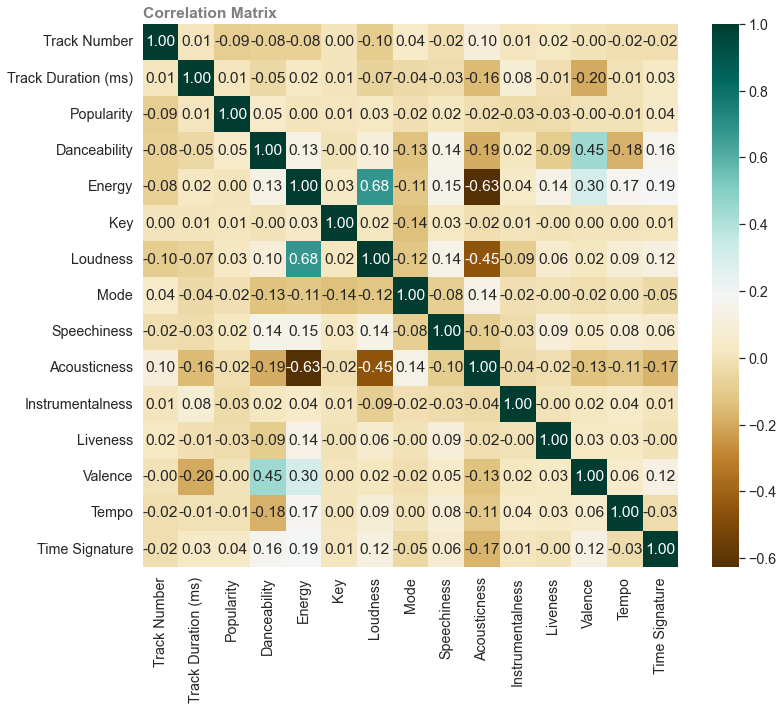

In [42]:
plt.figure(figsize=(12, 10))
sns.heatmap(num_df.corr(), cmap='BrBG', annot=True, fmt='.2f')
plt.title("Correlation Matrix", loc='left', color='gray', fontweight='bold')
plt.show()

---
## Hypothesis Tests

First part: **distribution tests**

### Test 1
What is the distribution of Danceability feature?

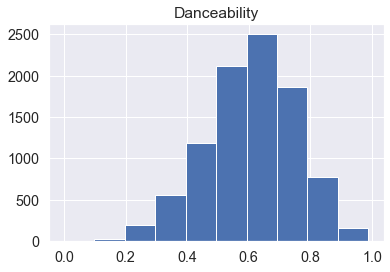

In [32]:
data['Danceability'].hist()
plt.title('Danceability')
plt.show()

Normality test
* H0: the sample has a normal distribution
* HA: the sample does not have a normal distribution

We use Shapiro-Wilk test for normality

In [47]:
stat, p = stats.shapiro(data['Danceability'])
print('stat={0:.3f}, p={0:.3f}'.format(stat, p))

stat=0.993, p=0.993


We cannot reject null hypothesis so the sample may have a normal distribution

### Test 2
Can we say that Time signature feature has a binomial distribution?

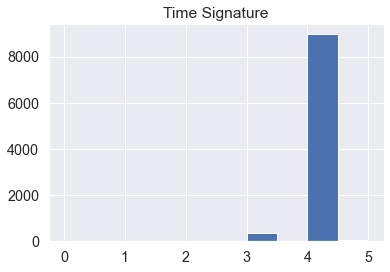

In [33]:
data['Time Signature'].hist()
plt.title('Time Signature')
plt.show()

Binomial distribution test
* H0: the sample has a binomial distribution
* HA: the sample does not have a binomial distribution

We use chisquare test

In [49]:
stat, p = stats.chisquare(data['Time Signature'].value_counts())
print('stat={0:.3f}, p={0:.3f}'.format(stat, p))

stat=33425.562, p=33425.562


We cannot reject null hypothesis so the sample may have a binomial distribution

Second part: **correlation tests**

### Test 3
How do Energy and Danceability relate to each other?

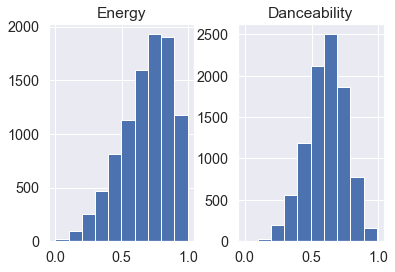

In [50]:
data[['Energy', 'Danceability']].hist()
plt.show()

Correlation test
* H0: the samples are correlated
* HA: the samples do not have any correlation

We use pearson method

In [51]:
stat, p = stats.pearsonr(data['Danceability'], data['Energy'])
print('stat={0:.3f}, p={0:.3f}'.format(stat, p))

stat=0.132, p=0.132


We cannot reject null hypothesis so the samples may have correlation

### Test 4
How do Energy and Loudness relate to each other?

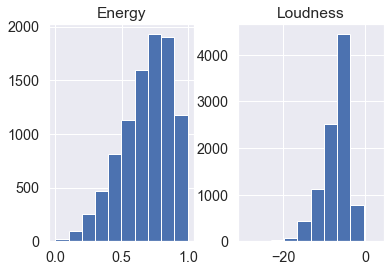

In [52]:
data[['Energy', 'Loudness']].hist()
plt.show()

Correlation test
* H0: the samples are correlated
* HA: the samples do not have any correlation

We use pearson method

In [53]:
stat, p = stats.pearsonr(data['Loudness'], data['Energy'])
print('stat={0:.3f}, p={0:.3f}'.format(stat, p))

stat=0.680, p=0.680


We cannot reject null hypothesis so the samples may have correlation

### Test 5
What is the most effective feature on Popularity?

In [54]:
data.corr()['Popularity'].sort_values(ascending=False)[0:3]

Popularity        1.000000
Danceability      0.052338
Time Signature    0.036170
Name: Popularity, dtype: float64

Danceability is the most effective one but with a low correlation

Third part: **parametric tests**

### Test 6
We had seen before in the table that 'Energy' and 'Danceability' have nearly equal means.

Are they really equal or is it just by chance?

In [55]:
data[['Energy', 'Danceability']].mean()

Energy          0.685295
Danceability    0.608087
dtype: float64

Comparison test
* H0: the mean between two samples are equal (it is not by chance)
* HA: the mean between two samples are not equal (it is by chance)

We use t-test 

In [56]:
stat, p = stats.ttest_ind(data['Energy'], data['Danceability'])
print('stat={0:.3f}, p={0:.3f}'.format(stat, p))

stat=31.282, p=31.282


So we cannot reject null hypothesis and these two features are not equal by chance.

They may have the same distribution as well. We'll check it.

Fourth part: **nonparametric tests**

### Test 7
Can we say the distribution of 'Energy' and 'Danceability' is the same?

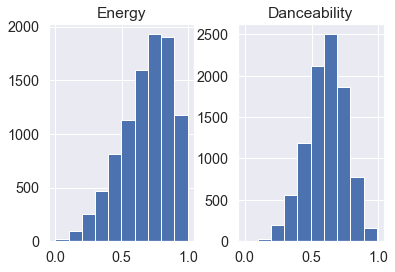

In [57]:
data[['Energy', 'Danceability']].hist()
plt.show()

Distribution comparison
* H0: the distribution of two samples is the same
* HA: the distribution of two samples is not the same

We use Mann-Whitney U test.

In [58]:
stat, p = stats.mannwhitneyu(data['Energy'], data['Danceability'])
print('stat={0:.3f}, p={0:.3f}'.format(stat, p))

stat=56972988.000, p=56972988.000


So we cannot reject null hypothesis and their distribution can be the same.